<hr>

# BATCH NORMALIZATION

- Which is better Batch Normalization before activation or after activation ?
- Discuss this through experiment results.

<hr>

# IMPLEMENTATION

### Importing libraries and Loading the dataset

In [1]:
from keras.layers import Dense, Flatten, BatchNormalization, Activation
from keras.models import Sequential

import numpy as np, pandas as pd, matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Scaling and Pre-Processing

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(48000, 28, 28)
(48000,)
(12000, 28, 28)
(12000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train = x_train / 255.0,
x_val = x_val / 255.0,
x_test = x_test / 255.0

### Defining various Neural Network Architectures

1. With Batch Normalization **before** activatiobn

In [5]:
model1 = Sequential()

model1.add(Flatten(input_shape=(28, 28), name="flatten1"))

model1.add(Dense(128, name='hidden1')),
BatchNormalization(epsilon=0.001, momentum=0.99, axis=-1),
Activation('relu'),

model1.add(Dense(64, name='hidden2')),
BatchNormalization(epsilon=0.001, momentum=0.99, axis=-1),
Activation('relu'),

model1.add(Dense(32, name='hidden3')),
BatchNormalization(epsilon=0.001, momentum=0.99, axis=-1),
Activation('relu'),

model1.add(Dense(10, 'softmax', name='output')),
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model1.summary())

history1 = model1.fit(x_train, y_train, epochs = 20, validation_data=(x_val, y_val))

C:\Users\Asus vivobook\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten1 (Flatten)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7656 - loss: 0.6774 - val_accuracy: 0.8163 - val_loss: 0.5259
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8350 - loss: 0.4733 - val_accuracy: 0.8363 - val_loss: 0.4715
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8403 - loss: 0.4625 - val_accuracy: 0.8380 - val_loss: 0.4724
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8428 - loss: 0.4442 - val_accuracy: 0.8517 - val_loss: 0.4394
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8497 - loss: 0.4300 - val_accuracy: 0.8386 - val_loss: 0.4611
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8474 - loss: 0.4319 - val_accuracy: 0.8334 - val_loss: 0.4717
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8541 - loss: 0.4161 - val_accuracy: 0.8449 - val_loss: 0.4509
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8516 - loss: 0.41

2. With Batch Normalization **after** activation

In [6]:
model2 = Sequential()

model2.add(Flatten(input_shape=(28, 28), name="flatten1"))

model2.add(Dense(128, name='hidden1')),
Activation('relu'),
BatchNormalization(epsilon=0.001, momentum=0.99, axis=-1),

model2.add(Dense(64, name='hidden2')),
Activation('relu'),
BatchNormalization(epsilon=0.001, momentum=0.99, axis=-1),

model2.add(Dense(32, name='hidden3')),
Activation('relu'),
BatchNormalization(epsilon=0.001, momentum=0.99, axis=-1),

model2.add(Dense(10, 'softmax', name='output')),
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model2.summary())

history2 = model2.fit(x_train, y_train, epochs = 20, validation_data=(x_val, y_val))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten1 (Flatten)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7650 - loss: 0.6764 - val_accuracy: 0.8363 - val_loss: 0.4758
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8319 - loss: 0.4827 - val_accuracy: 0.8369 - val_loss: 0.4700
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8425 - loss: 0.4504 - val_accuracy: 0.8296 - val_loss: 0.4764
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8427 - loss: 0.4452 - val_accuracy: 0.8332 - val_loss: 0.5042
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8479 - loss: 0.4312 - val_accuracy: 0.8430 - val_loss: 0.4569
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8493 - loss: 0.4315 - val_accuracy: 0.8417 - val_loss: 0.4590
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8503 - loss: 0.4321 - val_accuracy: 0.8430 - val_loss: 0.4639
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8519 - loss: 0.42

### Analysis of the architectures

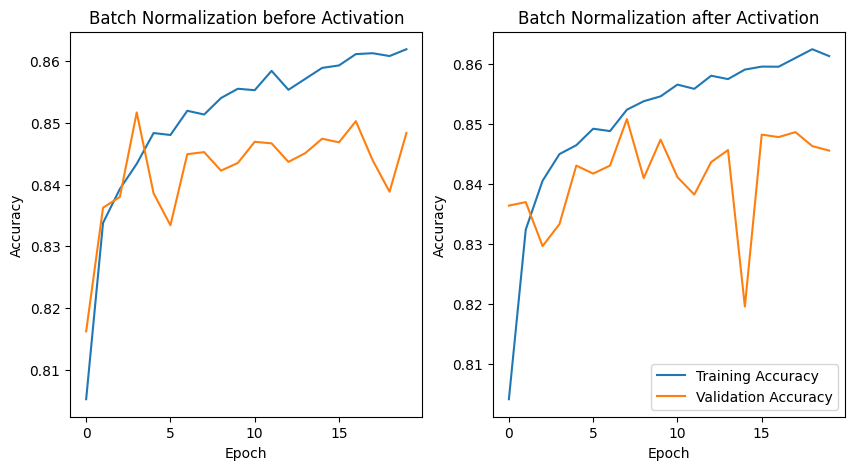

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Batch Normalization before Activation')
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Batch Normalization after Activation')
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()

In [8]:
preds1 = np.argmax(model1.predict(x_test), axis=1)
preds2 = np.argmax(model2.predict(x_test), axis=1)

print('TESTING ACCURACIES')

print("Accuracy for Batch Normalization BEFORE activation : ", accuracy_score(y_test, preds1))
print("Accuracy for Batch Normalization AFTER activation : ", accuracy_score(y_test, preds2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
TESTING ACCURACIES
Accuracy for Batch Normalization BEFORE activation :  0.8329
Accuracy for Batch Normalization AFTER activation :  0.8348


<hr>

# Takeaways and Inferences

- Using Batch Normalization before or after activation do not really have a significant impact, as we can see that testing accuracies in both the cases are almost similar.

- The disparity in performance between the two implementations is minimal.

- The slight difference observed is that the 'after' approach attends more accuracy, however around 12th approach, accuracy slightly dropped.

- these observations may differ in other contexts due to various factors, including the number of training epochs, the complexity of the dataset, and the architecture of the neural network.

<hr>
<hr>